In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import joblib

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df = df.drop("CustomerID", axis=1)
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

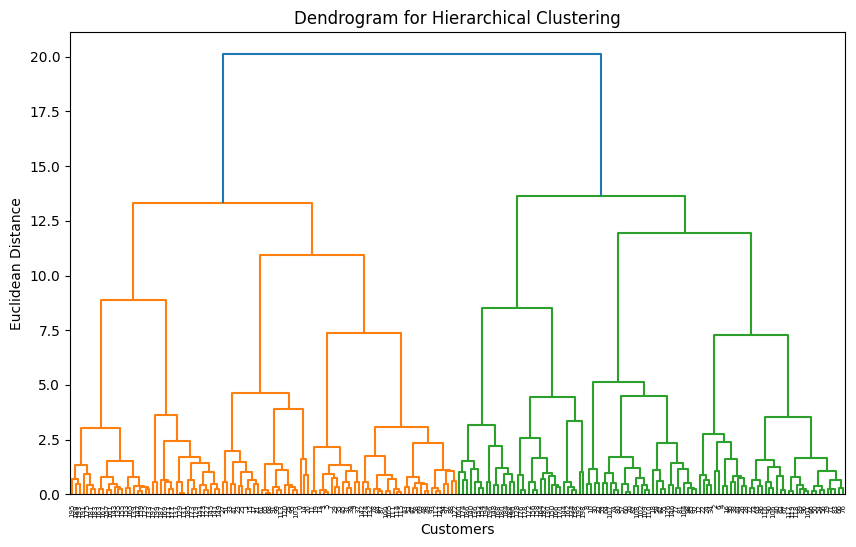

In [ ]:
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method="ward")

dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
hc = AgglomerativeClustering(
    n_clusters=5,   # chosen from dendrogram
    linkage="ward"
)

labels = hc.fit_predict(X_scaled)
print("\nDataset with Cluster Labels:")
print(df.head())


Dataset with Cluster Labels:
   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40


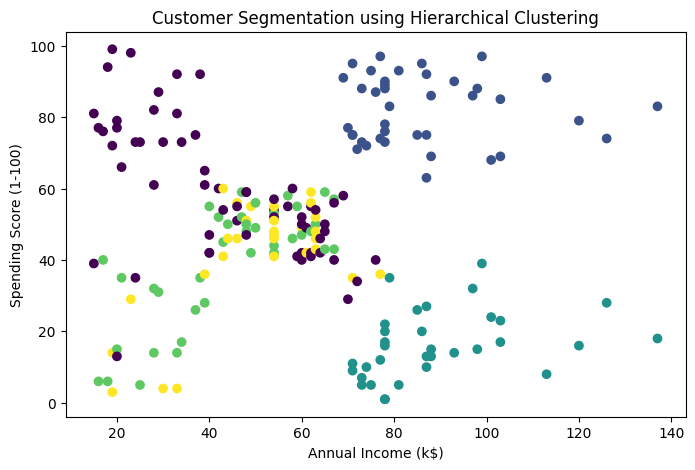

In [ ]:
df["Cluster"] = labels
plt.figure(figsize=(8, 5))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"]
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using Hierarchical Clustering")
plt.show()

NameError: name 'X' is not defined

In [ ]:
sil_score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", sil_score)



Silhouette Score: 0.28699413201651747


In [ ]:
joblib.dump(hc, "hierarchical_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and Scaler saved successfully!")


Model and Scaler saved successfully!


In [ ]:
from google.colab import files
files.download("hierarchical_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>